In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
1993-11-11,26.277462,26.419119,26.259755,26.348291,88900,25.383038,NaN,NaN,NaN
1993-11-12,26.401409,26.489945,26.312873,26.330580,108200,25.392782,1.0,0.004717,0.004717
1993-11-15,26.383694,26.454522,26.312865,26.454522,243300,25.401569,1.0,0.004043,0.004043
1993-11-16,26.507639,26.525346,26.330567,26.436810,492600,25.410714,1.0,0.008759,0.008759
1993-11-17,26.365982,26.525347,26.295153,26.525347,39600,25.417846,1.0,0.003369,0.003369
...,...,...,...,...,...,...,...,...,...
2025-04-21,513.880005,521.700012,508.459991,521.159973,69368100,570.276754,-1.0,18.555922,2.812034
2025-04-22,527.250000,529.299988,519.190002,520.140015,75948100,570.181573,-1.0,19.064723,2.712854
2025-04-23,535.419983,545.429993,533.880005,540.429993,90590700,570.111491,-1.0,19.375635,2.655321


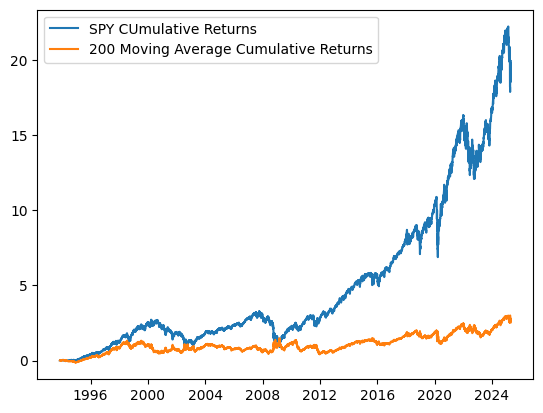

In [2]:
TICKER = 'SPY'
WINDOW = 200

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    df['MA'] = df['Close'].rolling(WINDOW).mean()
    return df.dropna()

def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df):
    df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1
    df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy']) - 1

    # plot the returns
    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{TICKER} CUmulative Returns', f'{WINDOW} Moving Average Cumulative Returns'])
    return df


def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()